<h2 align="center" <p style="font-family: times; font-size:30pt;"><b>Avocado Sales in the US<b></p></center></h3><br>
<h3 align="center" <p style="font-family: times; font-size:18pt;">Presented by: The Data Wranglers</p></center></h3> 
<h3 align="center" <p style="font-family: times; font-size:14pt;">Jovany D Gonzalez, Rashmi Choksey and Jorge Rafael Medina</p></center></h3> 
<img src="https://cdn.pixabay.com/photo/2017/08/15/14/34/avocado-2644150__340.jpg" width="300" height="300"><h3 <p style="font-family: times; font-size:8pt;">     Photo by Foodie Factor from Pexels</p></h3>

# Introduction

### Our project is about the Avocado sales in the U.S. from 2015 to 2019.
### Dataset source: 
https://www.kaggle.com/timmate/avocado-prices-2020.

This is an updated version of the avocado dataset originally compiled from the Hass Avocado Board (or HAB, for short) data and published on Kaggle by Justin Kiggins in 2018. According to the HAB, data was gathered every Sunday.

According to a report published by M. Shahbandeh called “U.S. annual avocado consumption 1985-2020” on statista.com, the top two reasons consumers claimed for buying avocados were that they were “healthy” and “contain good fats”.

Almost 2.6 billion pounds of the berry being consumed by Americans in 2020. Per capita consumption has increased from 2 pounds in 2001 to nearly 8 pounds in 2018. https://www.statista.com/statistics/591263/average-avocado-consumption-us-per-week/

"The demand has just been incredible," said Emiliano Escobedo, director of the Hass Avocado Board. "I think avocados are pretty much mainstream at this point."

Avocado toast has become the subject of memes and also as a California trend. But then, who doesn't love guacamole or avocado toast?

So let's explore some data about avocados.

# Questions <b>
    
#### Question 1 - Which cost more? Organic avocados or Conventional avocados?
#### Question 2 - Have sales of Organic Small Bags increased over the years?
#### Question 3 - What was the Average Price of all avocados each Year?
#### Question 4 - What was the range of Average Prices of avocados within a year?
#### Question 5 - What was the Average Price of avocados through the years 2015-2019?
#### Question 6 - Which Region bought the most Small and Large Bags?
#### Question 7 - What was the difference in Average Price between 2015 and 2019?
#### Question 8 - Is there a relationship between the sales of Small size and Small Bags of avocados?
#### Question 9 - Did the price hike have an inpact on the sales of avocados in 2017?
#### Question 10 - Which Quarter showed higher sales through the years?
#### Question 11 - In which Region were the most avocados sold?
#### Question 12 - Which major Cities buy the most and least avocados by Volume and Bags?
#### Question 13 - Do Small size avocados sell more than the Large and XLarge?


# Hypotheses
#### These are our assertions:

#### 1) More Small Bags of avocados were sold than Large Bags
#### 2) The Average Price of avocados was higher in 2015 than 2019
#### 3) More avocados were sold in Los Angeles than New York City

# Importing Required Libraries
#### The first order of business is to import all the libraries that will be needed.

In [1]:
# Various libraries needed to be imported for this project.

# Code to hide warning messages
import warnings
warnings.filterwarnings("ignore")
# Importing important libraries
import numpy as np
import pandas as pd
import datetime as dt
# Importing Vizualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="ticks")
from plotly import __version__
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
import cufflinks as cf
cf.go_offline()
# Import Statistics Library
from scipy import stats
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import normaltest
from statsmodels.stats.weightstats import CompareMeans
from scipy.stats import skew 
import scipy.stats as stats

# Importing Data

In [2]:
# Import and read .csv file from Kaggle.com (https://www.kaggle.com/timmate/avocado-prices-2020). 
# This is a pretty large size dataset. 

avo=pd.read_csv('avocado-updated-2020.csv')

#### Now that we have our data, we can set it as a DataFrame.

In [3]:
# The use of .head() shows us the first 5 rows of data at the top of the dataframe.
avo.head(3)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta


In [4]:
# The use of .tail() shows us the last 5 rows of data at the bottom of the dataframe.
avo.tail(3)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
30018,2020-05-17,1.71,384158.00,23455.0,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.1,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico
30020,2020-05-17,1.58,36881.00,1147.0,1243.00,2645.00,31846.00,25621.00,6225.00,0.00,organic,2020,West Tex/New Mexico


### These are the columns within the dataset: <b>

    1) Date – Weekly observation dates from 2015-2020
    2) Average Price – Average price of avocados
    3) Total Volume – Total # of Avocados by PLU sold during that week (the reading is taken every Sunday)
    4) PLU # 4046 (small) (PLU = Price Look-Up)
    5) PLU # 4225 (large)
    6) PLU # 4770 (extra large)
    7) Total Bags – Total bags sold
    8) Small Bags
    9) Large Bags
    10) XLarge Bags
    11) Type – Organic or Conventional
    12) Year – Year of observation
    13) Geography – City or Region of the observation

In [5]:
# .shape() shows us how many columns and rows of data there are in the dataframe.
avo.shape

(30021, 13)

In [6]:
# .info() is used to find out the category, non-null count and data type (.dtypes) so we can find out if any changes need to be
# made, e.g. whether a category needs to be changed to a number. In this dataset, everything is assigned the correct data type.
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


#### Note: There is no missing data in the columns, which means we can move forward with exploring, cleaning and formating the data.

## Exploring Data

In [7]:
# Show unique values for categorical data
avo.describe(include='object')

,date,type,geography
count,30021,30021,30021
unique,278,2,54
top,2015-02-22,conventional,Total U.S.
freq,108,15012,556


In [8]:
# Show numerical data
avo.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000
mean,1.390930,9.392546e+05,2.991073e+05,2.849014e+05,2.162937e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123
std,0.381347,3.813519e+06,1.289108e+06,1.169078e+06,1.009188e+05,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.110000,1.429853e+04,7.827800e+02,2.814000e+03,0.000000e+00,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000
50%,1.350000,1.242047e+05,1.052276e+04,2.456722e+04,1.867500e+02,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000
75%,1.630000,4.898029e+05,1.151556e+05,1.409472e+05,5.424160e+03,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000


In [9]:
# Displays the unique years in the dataset.
avo.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [10]:
# Displays all the Regions/States/Cities in the dataset.
avo.geography.unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

# Cleaning Data

In [11]:
# Check for null values
avo.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

#### There are no null values in our dataset. However, there are too many NaNs (Not a Number) in xlarge_bags for both Organic and Conventional avocados so we will drop this column later. 

In [12]:
# Check for NaN values - We did not write inplace=True because it interferes with the code later.
avo_nan=avo.replace(0, np.nan)
avo_nan.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,NaN,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,NaN,1162.65,1162.65,NaN,NaN,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,NaN,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,NaN,1408.19,1071.35,336.84,NaN,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,NaN,conventional,2015,Baltimore/Washington


## Organizing Data

In [13]:
# Sizes were renamed because the PLU (price look-up) numbers by themselves don't tell us what size the avocados are.

avo1=avo.rename(columns={'date':'Date',
'4046':'Small',
'4225':'Large',
'4770':'XLarge', 
'average_price':'Average Price', 
'total_volume':'Total Vol', 
'total_bags':'Total Bags', 
'small_bags':'Small Bags', 
'large_bags':'Large Bags',  
'xlarge_bags':'XLarge Bags',
'type':'Type', 
'year':'Year',
'geography':'Location', 
'month':'Month'})
avo1.head()

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Location
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


#### We are going to add the columns Revenue and Month to our dataframe.

In [14]:
# Revenue=Average Price*Total Volume+Total Bags
avo1['Revenue']=avo1['Average Price']*avo1['Total Bags'] 

# We added Month in the columns to add an extra variable for us to manipulate the data
avo1['Month']=pd.DatetimeIndex(avo['date']).month
avo1.head()

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Location,Revenue,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,11854.0812,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,2081.1435,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46815.7900,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,2478.4144,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,152427.6144,1


#### In order to show the months by name, we are changing the numerical value to a string.

In [15]:
#Define recode_month() 
# Convert numerical month to month names.

def recode_month(Month): 

    if Month == 1:         
        return 'Jan'          
    elif Month == 2:         
        return "Feb"
    elif Month == 3:         
        return "Mar"
    elif Month == 4:         
        return "Apr"
    elif Month == 5:         
        return "May"
    elif Month == 6:         
        return "Jun"
    elif Month == 7:         
        return "Jul"
    elif Month == 8:         
        return "Aug"
    elif Month == 9:         
        return "Sep"
    elif Month == 10:         
        return "Oct"
    elif Month == 11:         
        return "Nov"
    elif Month == 12:         
        return "Dec"

# Return np.nan         
    else:         
        return np.nan


In [16]:
# Apply the function to the Month column and create Month Names
avo1['Month Name']=avo1['Month'].apply(recode_month)
avo1.head(3)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Location,Revenue,Month,Month Name
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,11854.0812,1,Jan
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,2081.1435,1,Jan
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46815.7900,1,Jan


In [17]:
avo1['Month Name'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

#### Date had to be converted from a numerical value to a datetime64 dtype before Quarters could be added as a column.

In [18]:
# Get 4 quarters from the year
avo1.Date = pd.to_datetime(avo1.Date)
avo1["Quarter"] = avo1.Date.dt.quarter
avo1.head(3)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,11854.0812,1,Jan,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,2081.1435,1,Jan,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46815.7900,1,Jan,1


#### Several data need to be dropped before proceeding with pivot tables and vizualizations.
- As mentioned above, we are dropping XL Bags.
- We are also dropping all rows of Organic from the column Type because of too many null values and missing data. However, we will show a couple of graphs to display some relevant information.  
- We are also making two data sets where one only has "Conventional" and another has "Organic." 

In [19]:
# Drop XL Bags because it has a lot of 0 values
avo_D= avo1.drop(['XLarge Bags'], axis=1)

# Drop Organic (If we just used Date it would only give us data from Albany. 
# If we just used Location it only gave data from the first month.)

avo2= avo_D[avo1.Type!='organic']          # Does not contain Organic
avo3= avo_D[avo1.Type!='conventional']     # Does not contain Conventional

avo2.head(5)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,11854.0812,1,Jan,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,46815.7900,1,Jan,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,152427.6144,1,Jan,1
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,conventional,2015,Boise,7833.1762,1,Jan,1
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,conventional,2015,Boston,89416.3926,1,Jan,1


#### The year 2020 will also not be included in our dataframe because it has incomplete data. 
However, we are creating two datasets without the year 2020
- avo20 is for Conventional avocados
- avo21 is for Organic avocados

#### Going forward avo20 will be the DataFrames we will be working from, which does NOT have:
- Year 2020
- XL Bags of Conventional and Organic, and
- All Organic avocados

In [20]:
# We can delete data just using the index or we could specify certain columns/rows and just get rid of chunks of data.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html.

# The year 2019 data ends at index (#27859)

avo21= avo1.truncate(after=27859) #avo21 has Organic values also
avo20= avo2.truncate(after=27859) #avo20 is the name of the dataset with just the Conventional Avocados
avo20.tail()

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
27851,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,conventional,2019,Syracuse,2.864606e+04,12,Dec,4
27853,2019-12-29,0.84,673884.40,228420.96,20786.42,1569.02,423108.00,87462.15,335645.85,conventional,2019,Tampa,3.554107e+05,12,Dec,4
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,1.786576e+07,12,Dec,4
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,3.940776e+06,12,Dec,4
27859,2019-12-29,0.84,797419.57,313633.10,66511.40,79427.29,337847.78,217223.04,119482.38,conventional,2019,West Tex/New Mexico,2.837921e+05,12,Dec,4


#### Note: The data for the year 2019 ends with index #27859.

#### Create two dataframes for years 2015 and 2019 and then combine them.

In [153]:
# Create a dataframe for just 2015
a2015 = avo20.loc[avo1['Year']==2015]
a2015.head(3)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,11854.0812,1,Jan,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,46815.7900,1,Jan,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,152427.6144,1,Jan,1


In [154]:
#Now repeat the process for 2019
a2019= avo20.loc[avo1['Year']==2019]
a2019.tail(3)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,1.786576e+07,12,Dec,4
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,3.940776e+06,12,Dec,4
27859,2019-12-29,0.84,797419.57,313633.10,66511.40,79427.29,337847.78,217223.04,119482.38,conventional,2019,West Tex/New Mexico,2.837921e+05,12,Dec,4


In [155]:
#Let's combine both frames to use for a pivot table later
combine= [a2015,a2019]
avo4= pd.concat(combine)
avo4.head(3)

,Date,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Type,Year,Location,Revenue,Month,Month Name,Quarter
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,11854.0812,1,Jan,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,46815.7900,1,Jan,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,152427.6144,1,Jan,1


#### We made a dataset that combines the two years that we are using for comparison for this project. We will use this data set for later to comparing the two years to see which year did better in sales, selling a certain size, or to see which location sold better. - Line graph x=time, y=value

In [24]:
#For now we will just pull Large Bags, Size, the year, average price, geography and the date.
#Let's take a peak into 2015
ahead1=a2015[['Date','Average Price','Large','Large Bags','Location']]
ahead1.head()

,Date,Average Price,Large,Large Bags,Location
0,2015-01-04,1.22,28287.42,529.53,Albany
2,2015-01-04,1.00,23821.16,30108.64,Atlanta
4,2015-01-04,1.08,552906.04,3990.61,Baltimore/Washington
6,2015-01-04,1.01,24964.23,1691.32,Boise
8,2015-01-04,1.02,396752.18,256.29,Boston


In [25]:
print(a2015[['Average Price','Large Bags','Large']].mean())

Average Price         1.077963
Large Bags        43863.678276
Large            613450.264387
dtype: float64


#### This shows the mean of the Average Price for Large size and Large Bags of avocados.

In [26]:
# Let's create a dataset for the year 2019 only.
ahead2=a2019[['Date','Average Price','Large','Large Bags','Location']]
ahead2.head()

,Date,Average Price,Large,Large Bags,Location
22245,2019-01-07,1.07,112635.18,3761.86,Albany
22247,2019-01-07,0.92,38902.85,98477.41,Atlanta
22249,2019-01-07,1.31,530128.43,21233.05,Baltimore/Washington
22251,2019-01-07,1.23,7085.86,19049.95,Boise
22253,2019-01-07,1.34,597937.87,46691.34,Boston


#### We'll use this dataframe to show what Average Prices look like for Large and Large Bags for Location and Total Volume by Year.

In [27]:
# Create a list with the names of the Regions. We will use it to seperate them from the Cities.
Regions=['California','Great Lakes','Midsouth',
         'Northeast','Plains','South Central','Southeast','West']

# Create a dataframe with only the Regions using the list that was created.
Regionsdf=avo20.loc[avo1['Location'].isin(Regions)]
Regionsdf=Regionsdf[Regionsdf['Year']!=2020] #Removed the year 2020 in Regionsdf
# Display the unique values within the Location column.
Regionsdf['Location'].unique() 

array(['California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains',
       'South Central', 'Southeast', 'West'], dtype=object)

#### In the column Location, we found duplication of values because the Total US equals only Regions, but not the Cities or States. 

- So we created dataframes for Regions and Cities for comparison and used data from Regions for most of the plots.

- Also, we took out the few States in the dataset because they too duplicate the values and together would give a false picture of the data.

Map image from: https://www.theshelbyreport.com/2019/03/15/hass-avocado-purchasers-study/

<img src="HAB Regions Map.png" width="700" height="700">

In [28]:
# Create a list with the names of the Cities
Cities=['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Nashville', 'New Orleans/Mobile', 'New York',
       'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse',
       'Tampa','West Tex/New Mexico']

# Create a data frame with only the Cities using the Cities list that was created. 
Citiesdf=avo20.loc[avo1['Location'].isin(Cities)]
Citiesdf=Citiesdf[Citiesdf['Year']!=2020] #Removed the year 2020 in Citiesdf
# Display the unique values within the Location coluumn
Citiesdf['Location'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton',
       'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit',
       'Grand Rapids', 'Harrisburg/Scranton', 'Hartford/Springfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas',
       'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville',
       'New Orleans/Mobile', 'New York', 'Northern New England',
       'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh',
       'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
       'South Carolina', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa',
       'West Tex/New Mexico'], dtype=object)

#### We made a dataframe that combines the two cities that we are using for comparison for this project.

In [161]:
# Create a list of major cities for comparison
LAdf = Citiesdf.loc[Citiesdf['Location']=='Los Angeles']
NYdf = Citiesdf.loc[Citiesdf['Location']=='New York']
Houstondf = Citiesdf.loc[Citiesdf['Location']=='Houston']
Seattledf = Citiesdf.loc[Citiesdf['Location']=='Seattle']
Chicagodf = Citiesdf.loc[Citiesdf['Location']=='Chicago']
#putting our previous dataframes next to each other to prep for concat
combine= [LAdf,NYdf,Houstondf,Seattledf,Chicagodf] 
MajorCitiesdf= pd.concat(combine)

In [173]:
combine= [LAdf,NYdf] #putting our previous dataframes next to each other to prep for concat
avoCity= pd.concat(combine) #combininng our dataframes into one

# Pivoting

The pivot() function is used to reshaped a given DataFrame organized by given index / column values. 

In [29]:
# Let's find out which location has the Highest and Lowest Average Price by Year. 

a2015_pivot = pd.pivot_table(a2015, index = 'Average Price', columns = 'Year', values = 'Location', aggfunc = 'sum')
a2015_pivot

Year,2015
Average Price,
0.49,Phoenix/Tucson
0.51,Phoenix/Tucson
0.52,Phoenix/Tucson
0.53,Phoenix/TucsonPhoenix/TucsonPhoenix/Tucson
0.54,Phoenix/Tucson
...,...
1.55,San Francisco
1.56,San FranciscoSan FranciscoBuffalo/RochesterSan...
1.57,San Francisco


#### As we can see above, in 2015, Phoenix/Tucson had the lowest Average Pricein 2015 and San Francisco consistently had the highest Average price.

In [30]:
# Let's find out which location and Year by Average Price, Large, Large Bags and Total Volume. 
avo_pivot= pd.pivot_table(data=avo4, index='Location', values=['Average Price','Total Vol', 
                                                               'Large Bags','Large', 'Type'], 
                                                                columns= 'Year')
avo_pivot.head()

Average Price                    Large                 \
Year                          2015      2019           2015           2019   
Location                                                                     
Albany                    1.171923  1.260385   61764.253654  102825.485000   
Atlanta                   1.052308  1.068846   35386.637308   33618.435962   
Baltimore/Washington      1.168077  1.355000  487421.365385  467066.467885   
Boise                     1.054038  1.335385   10164.187115    6748.566923   
Boston                    1.144038  1.396731  409901.282692  513963.240385   

                        Large Bags                     Total Vol  \
Year                          2015           2019           2015   
Location                                                           
Albany                  346.097500    5711.570192   76208.734231   
Atlanta               20621.039808   79147.914808  440346.444038   
Baltimore/Washington   4517.016346  108575.997885  768141.489231   
Boise                   354.146538   24528.243654   70885.752885   
Boston                 1451.942692   39781.165769  523780.612115   

                                     
Year                           2019  
Location                             
Albany                122483.080385  
Atlanta               721526.170385  
Baltimore/Washington  919231.600000  
Boise                 102344.003846  
Boston                687918.475577

In [168]:
# Let's find out which location and Year by Average Price, Large, Large Bags and Total Volume. 
Revenue_pivot= pd.pivot_table(data=avo4, index='Location', values=['Average Price','Small Bags', 
                                                               'Large Bags'], columns= 'Year')
Revenue_pivot.head()

Average Price              Large Bags                 \
Year                          2015      2019          2015           2019   
Location                                                                    
Albany                    1.171923  1.260385    346.097500    5711.570192   
Atlanta                   1.052308  1.068846  20621.039808   79147.914808   
Baltimore/Washington      1.168077  1.355000   4517.016346  108575.997885   
Boise                     1.054038  1.335385    354.146538   24528.243654   
Boston                    1.144038  1.396731   1451.942692   39781.165769   

                         Small Bags                 
Year                           2015           2019  
Location                                            
Albany                 12389.069231    8581.601346  
Atlanta                35822.103846  300010.847885  
Baltimore/Washington  174485.440962  225783.266538  
Boise                   9084.977308   24361.851923  
Boston                106131.438269  120709.386923

# Data Visualization

### Before we start with the rest of the vizualizations, even though we have dropped Organic from the dataset, we want to show you some interesting information about their pricing in a few graphs.

### <p style="color:blue">Question 1 - Which cost more? Organic avocados or Conventional avocados?</p>

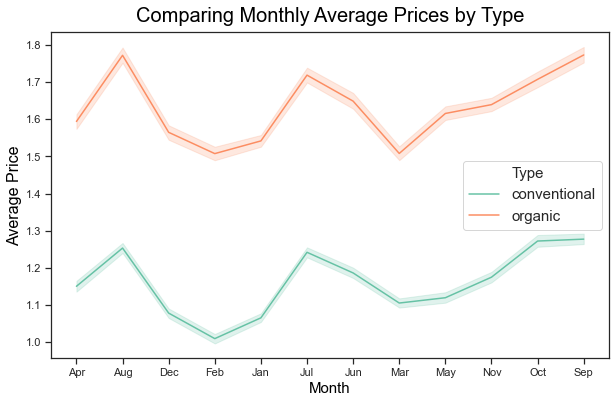

In [32]:
# Create a lineplot that shows the Average Price of Organic and Conventional avocados.
# Set figure size
plt.figure(figsize=(10,6))
# Create plot
sns.lineplot(x="Month Name", y="Average Price", hue='Type', data=avo21, palette = "Set2")
#Set Title and Labels
plt.title("Comparing Monthly Average Prices by Type",fontsize=20,color='black', pad=10)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Average Price',fontsize=16,color='black')
#set legend
leg = plt.legend(fontsize=15)
plt.show()

#### Conclusion - 
Prices of Organic avocados always far surpass those of Conventional avocados, regardless of year. However, their sales and revenue cycle pretty much matches that of the Conventional avocados.

### <p style="color:blue">Question 2 - Have sales of Organic Small Bags increased over the years?</p>

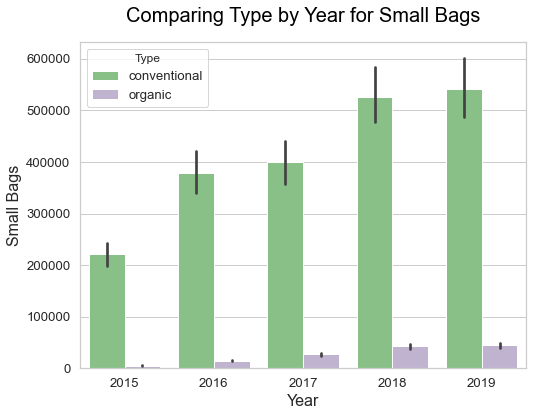

In [169]:
# This bar graph shows how much dispartity there is in available data between the 2 Types.

# Set figure 
plt.figure(figsize=(8,6)) 
# Display a plot 
sns.barplot(x='Year', y='Small Bags', data=avo21, hue='Type', palette='Accent')
# Set labels
plt.xlabel('Year',fontsize=16) 
plt.ylabel('Small Bags',fontsize=16) 
plt.title("Comparing Type by Year for Small Bags",fontsize = 20,color='black', pad=20)
# Show the plot 
plt.show()

#### Conclusion -
<p> We compared Small Bags of Avocados by type and measured how they well they did through the years. As we can see in 2015 Organic is almost non-existent, but as the years go on the demand for Organic Avocados  slowly rose over time. Conventional on the other hand thrived in demand and sold well that it surpasses the previous years total sales. For Conventional 2015 was the lowest at \$200k and rose all the way to \$550k in 2019.

### <p style="color:blue">Question 3 - What was the Average Price of all avocados in each Year?</p>

In [34]:
asdf=avo20.groupby('Year').mean()
asdf

,Average Price,Total Vol,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,Revenue,Month,Quarter
Year,,,,,,,,,,,
2015,1.077963,1.530128e+06,599719.474566,613450.264387,50540.495110,266417.698875,220615.584601,43863.678276,275303.961225,6.519231,2.500000
2016,1.105595,1.670317e+06,536580.093533,579296.707443,56540.788946,497899.295068,379069.014875,111694.138868,511897.143792,6.442308,2.500000
2017,1.294888,1.665327e+06,570801.128225,524296.098333,31727.793463,538501.945542,400361.766335,129757.346080,636685.865063,6.528302,2.528302
2018,1.141092,2.004880e+06,643231.268428,590600.315635,37318.461538,733729.486085,526018.508613,195894.259191,786245.034648,6.061224,2.387755
2019,1.187179,2.001003e+06,565990.278999,509628.327215,43051.641026,882330.119964,541608.683775,317068.794772,998361.629060,6.576923,2.500000


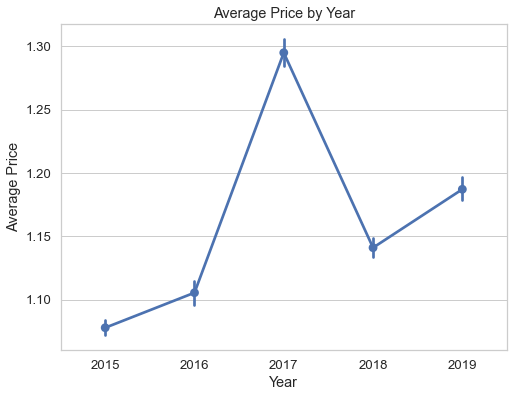

In [170]:
# Let's see if we can find out the Average Price by Year for Conventional Avocados.
# Set figure 
plt.figure(figsize=(8,6)) 
# Display a plot 
sns.set_style('whitegrid')
sns.pointplot(data=avo20,x='Year', y='Average Price')
plt.title('Average Price by Year')
plt.show()

#### Conclusion -
As we can see, the price has increased through the years, except in 2017 it was higher than in 2018.
- 2015 = 1.077
- 2016 = 1.055
- 2017 = 1.294
- 2018 = 1.141
- 2019 = 1.187

### <p style="color:blue">Question 4 - What was the range of Average Prices of avocados within a year?</p>

Text(1.0, 1.0, 'Comparing Average Prices by Month')

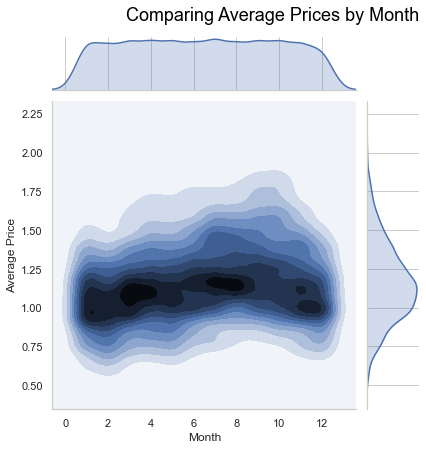

In [37]:
# Let's plot out the mean of the previous syntax avo20

sns.jointplot(x='Month',y='Average Price', data=avo20, kind='kde')
plt.title("Comparing Average Prices by Month",fontsize = 18,color='black', pad=80, loc='right')


#### Conclusion - 
<p> While viewing the splotch can be a bit confusing, this jointplot shows that the Average Price that was most frequent was in the \$1.00 - $1.25 range and was bought at this price as shown by the right bubble. For example in March and April, the splotch gets darker showing that price range as mentioned had a boom sales around this period. Although on the other hand, if we look at the outer edges it looks like not a lot of people were buying Avocados. Granted it is pricey to buy Avocados for around \$1.75, but it is odd that people wouldn't buy Avocados for less than 0.75 cents.

### <p style="color:blue">Question 5 - What was the Average Price of avocados through the years 2015-2019?</p>

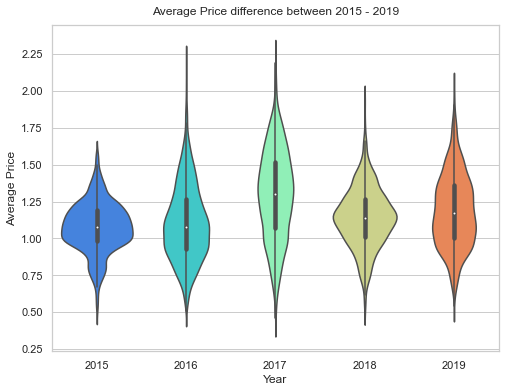

In [38]:
# Let's show the Average Price of avocados through the years 2015-2019.

plt.figure(figsize=(8,6))
plt.title("Average Price difference between 2015 - 2019", pad=10)
sns.violinplot(x="Year", y="Average Price", data=avo20,palette='rainbow')

#### Conclusion - 
<p>It appears that 2016 and 2017 had a price hike more than \\$1.75 in these years and seem more slim comparing it to the other years. There was also a bit of a drop in price in 2018, but the price rose again in 2019 to more than \\$1.75.

### <p style="color:blue">Question 6 - What was the difference in Average Price between 2015 and 2019?<p/>

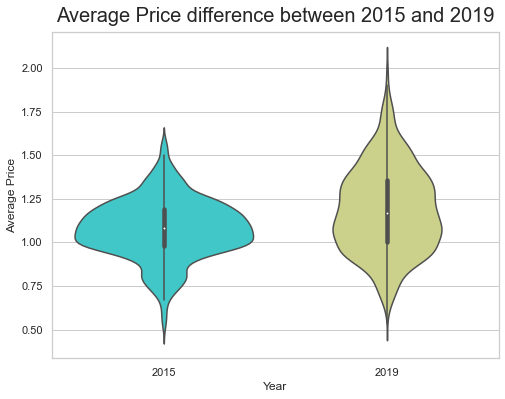

In [39]:
# Let's see the difference in the Average Price between 2015 and 2019.

# Set the figure size
plt.figure(figsize=(8,6))
# Create a violinplot to show Year and Average Price. Set the x and y labels.
sns.violinplot(x="Year", y="Average Price", data=avo4,palette='rainbow')
# Set the title
plt.title("Average Price difference between 2015 and 2019", fontsize=20,pad=10)
plt.show()

#### Conclusion - 
Although more avocados between the price range of .80 cents upto \\$1.25 in 2015, generally, more expensive avocados were sold in 2019 for between .80 cents upto \\$1.60.

# Quantitative Data Exploratory

### Correlation Matrix

In [41]:
def pearson_r(x, y):
    
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x, y)

        # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(Regionsdf['Year'], Regionsdf['Large Bags'])


# Print the result
print(r)

0.4697369280943779


In [42]:
def pearson_r(x, y):
    
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x, y)

        # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(Regionsdf['Year'], Regionsdf['Small Bags'])


# Print the result
print(r)

0.5336724158659081


### The next bit of code will help us find the mean, variance and standard deviation to use in our analysis later on.

In [45]:
# Print the variance: variance
print('Now that we have seen the variances let us see the covariances for Small Bags:',np.cov(avo20['Small Bags']))
print('Now let us see the covariances for Large Bags:',np.cov(avo20['Large Bags']))

Now that we have seen the variances let us see the covariances for Small Bags: 1502003924288.1194
Now let us see the covariances for Large Bags: 308303679814.7801


In [46]:
# Find the variance of the Sizes and Bags
print(np.var(Regionsdf[['Small Bags','Large Bags','Small','Large', 'XLarge']],ddof=1))

Small Bags    2.880490e+11
Large Bags    2.347129e+11
Small         1.110442e+12
Large         7.849025e+11
XLarge        1.581467e+10
dtype: float64


In [48]:
# Find the median of the Sizes and Bags
Regionsdf[['Small Bags','Large Bags','Small','Large', 'XLarge']].median()

Small Bags     950104.155
Large Bags     224313.630
Small         1317319.740
Large         1255196.280
XLarge          61274.880
dtype: float64

In [49]:
# Find the mean, count, std, min, percentages, etc. for Sizes and Bags
Regionsdf[['Small Bags','Large Bags','Small','Large', 'XLarge']].describe()

,Small Bags,Large Bags,Small,Large,XLarge
count,2.064000e+03,2.064000e+03,2.064000e+03,2.064000e+03,2064.000000
mean,1.044036e+06,4.046183e+05,1.514722e+06,1.417913e+06,110857.441318
std,5.367020e+05,4.844718e+05,1.053775e+06,8.859473e+05,125756.411256
min,1.773602e+05,4.405700e+02,6.992054e+04,1.573280e+05,2599.670000
25%,6.147151e+05,8.285500e+04,6.119001e+05,7.364477e+05,18179.105000
50%,9.501042e+05,2.243136e+05,1.317320e+06,1.255196e+06,61274.880000
75%,1.390885e+06,5.192189e+05,2.318055e+06,1.876728e+06,160318.425000
max,4.017035e+06,3.163442e+06,5.160897e+06,6.533193e+06,804558.250000


In [50]:
# Print the square root of the variance
variance= np.var(Regionsdf['Large Bags'])
print('Lets see the Square Root of the Variance for Large Bags:',np.sqrt(variance))
# Print the standard deviation
print('Here is the Standard Deviation for Large Bags:',np.std(Regionsdf['Large Bags']))

Lets see the Square Root of the Variance for Large Bags: 484354.382135261
Here is the Standard Deviation for Large Bags: 484354.382135261


### <p style="color:blue">Question 7 - Is there a relationship between the sales of Small size and Small Bags of avocados?<p/>

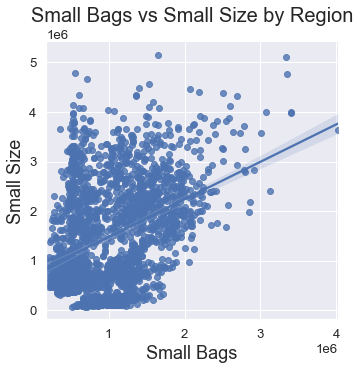

In [157]:
# Let's see the pattern of sales of Small Avocados by Region each year.
sns.lmplot(x='Small Bags', y='Small', data=Regionsdf, palette="Accent")

# Set title and labels
plt.xlabel('Small Bags',fontsize=18) 
plt.ylabel('Small Size',fontsize=18) 
plt.title('Small Bags vs Small Size by Region',fontsize=20, pad=20) 
# Show the plot 
plt.show()

#### Conclusion - 
This lmplot shows a similar distribution and positive relationship between Small size and Small Bags of avocados

### Let's see the Total Volume os Small and Large Bags sold in the Regions

### <p style="color:blue">Question 8 - Which Region bought the most Small and Large Bags?<p/>

In [53]:
# We're explaining why this plot is helpful, but also its limitations.
Sizesdf = Regionsdf[['Small Bags', 'Large Bags', 'Location']]
Sizesdf.iplot(kind='bar', x='Location',  xTitle='Sales of Small Bags and Large Bags by Region', yTitle='Sales in Millions', 
          title='Sales of Small Bags and Large Bags by Region')
# Show the plot 
plt.show()

#### Conclusion -
- Small Bags sold more in all regions. 
- Large Bags sold most in the West.
- A thing to note is that although the quantity of Small Bags sold in California, we have to remember that all the other regions have more than two states in them, whereas California is a state and a region at the same time for this comparison. So by comparison, California bought even more Small Bags than it seems. 
- Would have loved to explore this more, the limitation of this iplot is that the value of sales by weekend is stacked and so not easy to read.

# Groupby

In [54]:
# Make dataframes based on the year so we can call different years throughout the notebook
#There will be regions and cities 
Conv_2015_CT=Citiesdf.loc[Citiesdf['Year']==2015]
Conv_2016_CT=Citiesdf.loc[Citiesdf['Year']==2016]
Conv_2017_CT=Citiesdf.loc[Citiesdf['Year']==2017]
Conv_2018_CT=Citiesdf.loc[Citiesdf['Year']==2018]
Conv_2019_CT=Citiesdf.loc[Citiesdf['Year']==2019]

# Need to reset the index for the new data frames
Conv_2015_CT.reset_index(inplace=True)
Conv_2016_CT.reset_index(inplace=True)
Conv_2017_CT.reset_index(inplace=True)
Conv_2018_CT.reset_index(inplace=True)
Conv_2019_CT.reset_index(inplace=True)

Conv_2015_RG=Regionsdf.loc[Regionsdf['Year']==2015]
Conv_2016_RG=Regionsdf.loc[Regionsdf['Year']==2016]
Conv_2017_RG=Regionsdf.loc[Regionsdf['Year']==2017]
Conv_2018_RG=Regionsdf.loc[Regionsdf['Year']==2018]
Conv_2019_RG=Regionsdf.loc[Regionsdf['Year']==2019]

# Need to reset the index for the new data frames
Conv_2015_RG.reset_index(inplace=True)
Conv_2016_RG.reset_index(inplace=True)
Conv_2017_RG.reset_index(inplace=True)
Conv_2018_RG.reset_index(inplace=True)
Conv_2019_RG.reset_index(inplace=True)

In [55]:
#show if the count is different for any of the years
print(Conv_2015_RG['Average Price'].count())
print(Conv_2016_RG['Average Price'].count())
print(Conv_2017_RG['Average Price'].count())
print(Conv_2018_RG['Average Price'].count())
print(Conv_2019_RG['Average Price'].count())

416
416
424
392
416


We can see what years have diffferent counts.

# Empirical Cumulative Distribution Function (ECDF)

In [56]:
#Create a function to get the percentage of data
def ecdf(data):
    
    #n variable that gets the length of data
    n=len(data)
    
    #x variable that will store the sorted data
    x=np.sort(data)
    
    #y variable that will store a range from 1 to n+1 and divide by n
    y=np.arange(1,n+1)/n
    
    #return x and y
    return x,y

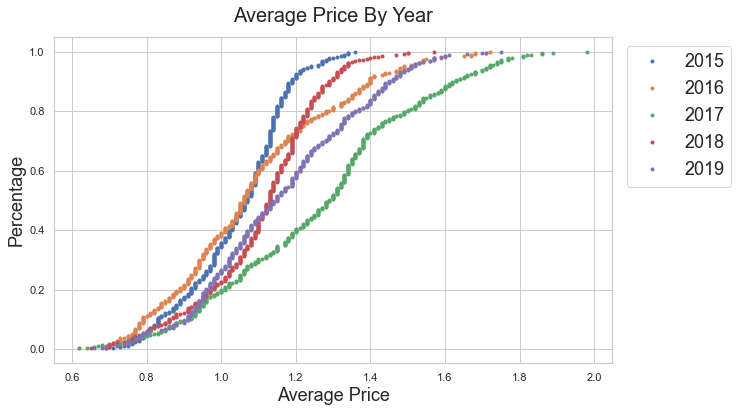

In [57]:
sns.set_style('whitegrid')
# Let's call the ecdf function we created to get the x and y calculations to plot the average price by year for regions.
#ecdf function returns two values, need to include two variables when calling: x and y
x15_price, y15_price=ecdf(Conv_2015_RG['Average Price']) #2015 Average prices
x16_price, y16_price=ecdf(Conv_2016_RG['Average Price']) #2016 Average prices
x17_price, y17_price=ecdf(Conv_2017_RG['Average Price']) #2017 Average prices
x18_price, y18_price=ecdf(Conv_2018_RG['Average Price']) #2018 Average prices
x19_price, y19_price=ecdf(Conv_2019_RG['Average Price']) #2019 Average prices


# Let's use the x and y value to create the plot.
# marker='.' to plot using a dot
# linestyle='none' will remove an overlapping line
AvgPrReg1=plt.figure(figsize=(10,6)) #change the plot size
AvgPrReg1=plt.plot(x15_price, y15_price,marker='.',linestyle='none') #plot 2015
AvgPrReg1=plt.plot(x16_price, y16_price,marker='.',linestyle='none') #plot 2016
AvgPrReg1=plt.plot(x17_price, y17_price,marker='.',linestyle='none') #plot 2017
AvgPrReg1=plt.plot(x18_price, y18_price,marker='.',linestyle='none') #plot 2018
AvgPrReg1=plt.plot(x19_price, y19_price,marker='.',linestyle='none') #plot 2019


# Create a legend, put the legend outside of the plot, change the font size
AvgPrReg1=plt.legend(('2015','2016','2017','2018','2019'),bbox_to_anchor=(1.01,1),fontsize=18) 
#Add a title to the plot, change the fontsize to 30, pad=15 to raise the title 
AvgPrReg1=plt.title('Average Price By Year',fontsize=20,pad=15)
#Name the x axis, change the font size to 18
AvgPrReg1=plt.xlabel('Average Price',fontsize=18)
#label the y axis, change the fontsize to 18
AvgPrReg1=plt.ylabel('Percentage',fontsize=18) 

In [58]:
#print out th percentiles using the sorted prices from the ecdf plot: x_price
#np.percentile will get the percentages using two arrays,in this case (prices , percentages)
print('2015:',np.percentile(x15_price,[20,60,90,100])) 
print('2016:',np.percentile(x16_price,[20,60,90,100]))
print('2017:',np.percentile(x17_price,[20,60,90,100]))
print('2018:',np.percentile(x18_price,[20,60,90,100]))
print('2019:',np.percentile(x19_price,[20,60,90,100]))

2015: [0.92 1.1  1.19 1.36]
2016: [0.89 1.1  1.4  1.72]
2017: [1.01  1.34  1.627 1.98 ]
2018: [0.98 1.16 1.29 1.57]
2019: [0.96 1.21 1.45 1.75]


#### Conclusion -
The plot above shows how the average price kept rising through out the years 2015, 2016 and 2017.
- 2015 and 2016 both had 60% or less of avocados at the average price of \$1.10.
- 2017 had 60% or less of avocados at the average price of \$1.34. 

The above plot also shows the percentages for the average price in 2015, 2016, and 2017 for Regions. We can see that: 
- 20% of Regions sold avocados for the average price of \$.98 or less.
- 60% of Regions sold avocados for the average price of \$1.34 or less.
- 90% of Regions sold avocados for the average price of \$1.62 or less.
- 100% of Regions sold avocados for the average price of \$1.98 or less.

### <p style="color:blue">Question 9 - Did the price hike have an inpact on the sales of avocados in 2017?<p/>
Compare 2017 and 2019 Small Avocado Sales
Why compare 2017 vs 2019? 2017 had a harvesting shortage resulting in a price hike and 2019 is the most recent complete data.

25th, 50th, 75th percentiles respectively 2017: [1.0575 1.29   1.43  ]
25th, 50th, 75th percentiles respectively 2019: [0.99 1.15 1.32]
2017 max: 1.98
2019 max: 1.75


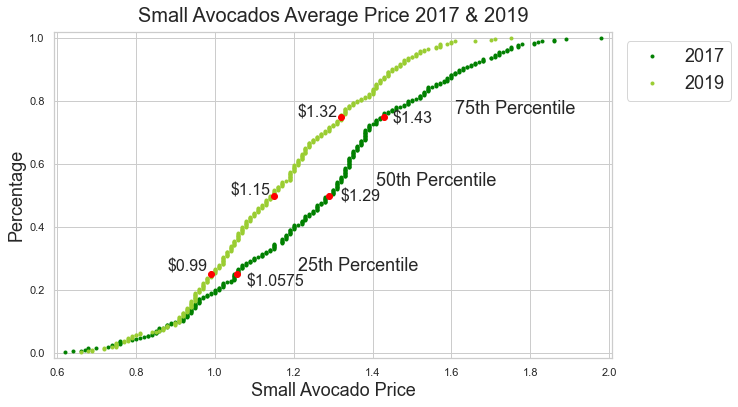

In [59]:
sns.set_style('whitegrid')
# Call the function ecdf to calculate the percentages for small avocados
xS17_price,yS17_price=ecdf(Conv_2017_RG['Average Price'])
xS19_price,yS19_price=ecdf(Conv_2019_RG['Average Price'])

#Get the 25, 50, and 75th percentile for 2017 and 2019 prices
#np.percentile will get the percentages using two arrays,in this case (prices , percentages)
perc17Pr=np.percentile(xS17_price,[25,50,75])#2017
perc19Pr=np.percentile(xS19_price,[25,50,75])#2019

# plot using xS17, xS19 and yS17,yS19 variables
# marker='.' to plot using a dot
# linestyle='none' will remove an overlapping line
S1719price=plt.figure(figsize=(10,6)) #set the plot size

#plot the dot on 2017, use green line
S1719price=plt.plot(xS17_price,yS17_price,marker='.',linestyle='none',color='green')
#plot the dot on 2019, use yellowgreen line
S1719price=plt.plot(xS19_price,yS19_price,marker='.',linestyle='none',color='yellowgreen')
S1719price=plt.plot(perc17Pr,[.25,.50,.75],marker='o',color='red',linestyle='none')  #plot 2017
S1719price=plt.plot(perc19Pr,[.25,.50,.75],marker='o',color='red',linestyle='none')  #plot 2019

"""                         Plot Editing             """
#add a title, change fontsize, pad to move title up
S1719price=plt.title('Small Avocados Average Price 2017 & 2019',fontsize=20,pad=10) 
#add a legend, put the legend out side of the plot
S1719price=plt.legend(('2017','2019'),bbox_to_anchor=(1.01,1),fontsize=18)
S1719price=plt.xlabel('Small Avocado Price',fontsize=18) #x axis title, change fontsize to 18
S1719price=plt.ylabel('Percentage', fontsize=18) #y axis label, change font size to 18
S1719price=plt.margins(.02) #Give some space at the edges

"""                         Annotations                     """
#set annotations for the 25th ,50th and 75th percentile
#xy will set the placement for the annotation
#change the annotation font size to 18
S1719price=plt.annotate(s='25th Percentile',xy=(1.21,.26),fontsize=18) #annotate 25th percentile
S1719price=plt.annotate(s='$1.0575',xy=(1.08,.21),fontsize=16) #annotate 2017 price
S1719price=plt.annotate(s='$0.99',xy=(.88,.26),fontsize=16,)#annotate 2019 price
S1719price=plt.annotate(s='50th Percentile',xy=(1.41,.53),fontsize=18) #annotate 50th percentile
S1719price=plt.annotate(s='$1.29',xy=(1.32,.48),fontsize=16) #annotate 2017 price
S1719price=plt.annotate(s='$1.15',xy=(1.04,.50),fontsize=16) #annotate 2019 price
S1719price=plt.annotate(s='75th Percentile',xy=(1.61,.76),fontsize=18) #annotate 75th percentile
S1719price=plt.annotate(s='$1.43',xy=(1.45,.73),fontsize=16) #annotate 2017 price
S1719price=plt.annotate(s='$1.32',xy=(1.21,.75),fontsize=16)#annotate 2019 price


#print out the 25th, 50th and 75th percentiles for 2019 and 2019
print('25th, 50th, 75th percentiles respectively 2017:',perc17Pr)
print('25th, 50th, 75th percentiles respectively 2019:',perc19Pr)
print('2017 max:',Conv_2017_RG['Average Price'].max()) #print max average price in 2017
print('2019 max:',Conv_2019_RG['Average Price'].max()) #print max average price in 2019

#### Conclusion -

Just by looking at the graph, we can see the price hike in 2017, lets look at the percentiles.

- At the 25th percentile, 2017 had a higher price at \\$1.0575 and 2019 had the lower price at \\$0.99. The interesting part is that the price stayed similar for about 12% of regions, so only about 13% of regions sold avocados at a slightly higher price.

- At the 50th percentile, 2017 kept the lead hitting \\$1.29 and 2019 was lower at \\$1.15, a 14 cent price difference.

- At the 75th percentile, 2017 had prices at \\$1.43 for small avocados while 2019 had them at \\$1.32, an 11 cent difference.

- And just for fun, the max price in 2017 was \\$1.98 and 2019 had the max price of \\$1.75, a 23 cents difference for small avocados. Imagine buying small avocados for \\$1.98.

25th, 50th, 75th percentiles respectively 2017: [ 606734.25   1369422.375  2263044.5925]
25th, 50th, 75th percentiles respectively 2019: [ 730038.68   1383418.07   2023002.2025]


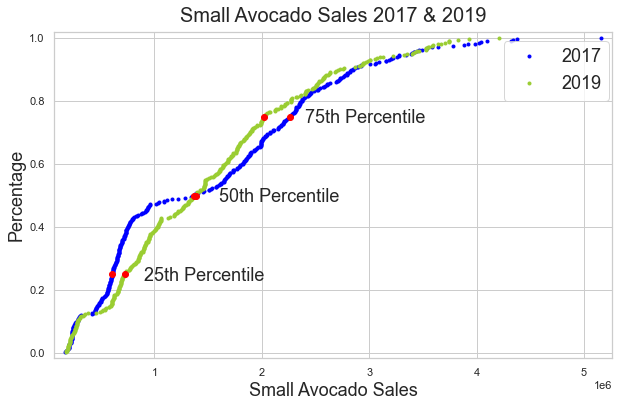

In [60]:
sns.set_style('whitegrid')
# Call the function ecdf to calculate the percentages for small avocados
xS17_size,yS17_size=ecdf(Conv_2017_RG['Small'])
xS19_size,yS19_size=ecdf(Conv_2019_RG['Small'])

#Get the 25, 50, and 75th percentile for 2017 and 2019 volume sales
#np.percentile will get the percentages using two arrays,in this case (amount , percentages)
perc17=np.percentile(xS17_size,[25,50,75])#2017
perc19=np.percentile(xS19_size,[25,50,75])#2019

"""                         Plotting                 """
# plot using xS17, xS19 and yS17,yS19 variables
# marker='.' to plot using a dot
# linestyle='none' will remove an overlapping line
S1719Sale=plt.figure(figsize=(10,6)) #set the plot size

S1719Sale=plt.plot(xS17_size,yS17_size,marker='.',linestyle='none',color='blue')#plot the dot on 2017, use green line
S1719Sale=plt.plot(xS19_size,yS19_size,marker='.',linestyle='none',color='yellowgreen')#plot the dot on 2019, use yellowgreen line
S1719Sale=plt.plot(perc17,[.25,.50,.75],marker='o',color='red',linestyle='none')#plot 2017
S1719Sale=plt.plot(perc19,[.25,.50,.75],marker='o',color='red',linestyle='none')#plot 2019

"""                         Plot Editing             """
S1719Sale=plt.title('Small Avocado Sales 2017 & 2019',fontsize=20,pad=10) #add a title, change fontsize, pad to move title up
S1719Sale=plt.legend(('2017','2019'),bbox_to_anchor=(1.01,1),fontsize=18)#add a legend, put the legend out side of the plot
S1719Sale=plt.xlabel('Small Avocado Sales',fontsize=18) #x axis title, change fontsize to 18
S1719Sale=plt.ylabel('Percentage', fontsize=18) #y axis label, change font size to 18
S1719Sale=plt.margins(.02) #Give some space at the edges


"""                         Annotations              """
#set annotations for the 25th ,50th and 75th percentile
#xy will set the placement for the annotation
#change the annotation font size to 18
S1719Sale=plt.annotate(s='25th Percentile',xy=(900000,.23),fontsize=18) #25th percentile annotation
S1719Sale=plt.annotate(s='50th Percentile',xy=(1600000,.48),fontsize=18) #50th percentile annotation
S1719Sale=plt.annotate(s='75th Percentile',xy=(2400000,.73),fontsize=18) #75th percentile annotation



#Show the Min and Max average price
print('25th, 50th, 75th percentiles respectively 2017:',perc17)
print('25th, 50th, 75th percentiles respectively 2019:',perc19)

#### Conclusion -
We can see that the price hike did indeed affect the sales but not in the way that you would think. It is apparent that for 50% of the regions, they actually sold more in 2017 with a higher average price than in 2019.

25th percentile: regions were selling 606,734 avocados in 2017 and 2019 had regions selling 730,038 avocados. 

50th percentile: regions were selling 1,369,422 avocados in 2017 and 2019 had regions selling 1,383,418 small avocados. Those numbers are a little bit closer than the first 25 percent of regions.

75th percentile:Regions were selling 2,263,044 avocados in 2017 and 2019 was selling 2,023,002. 

It is interesting that a higher price will not stop us from having avocados in our diet. 

<h3><p>GREAT!! Now that we have added Quarters to our Dataset let us see how much has Average Price has changed over time.

### <p style="color:blue">Question 10 - Which Quarter showed higher sales through the years?<p/>

Text(0.5, 0.98, 'Annual Sales by Quarter')

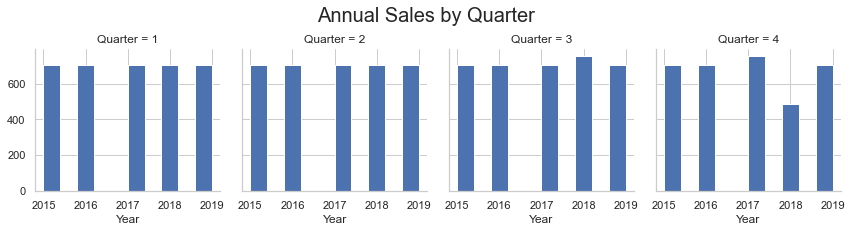

<Figure size 720x432 with 0 Axes>

In [61]:
# Let's show how the sales were by Quarter through the Years

quart=sns.FacetGrid(data=avo20,col='Quarter')
#quart.map(plt.hist,'Average Price') this was a reference
plt.figure(figsize=(10,6))
quart.map(plt.hist,'Year')
plt.suptitle("Annual Sales by Quarter", verticalalignment='bottom', fontsize=20)

#### Conclusion -
<p> The Annual Sales show that Avocado sales dont change too much until Quarter 3. In 2018 Quarter 3 Avocado sales rose, but then sales drop nearly in half during the 4th Quarter. In Quarter 4, 2017 sales rose above when compared to the other years.

#### The conclusion in the ECDF above bears out in this boxplot as well.

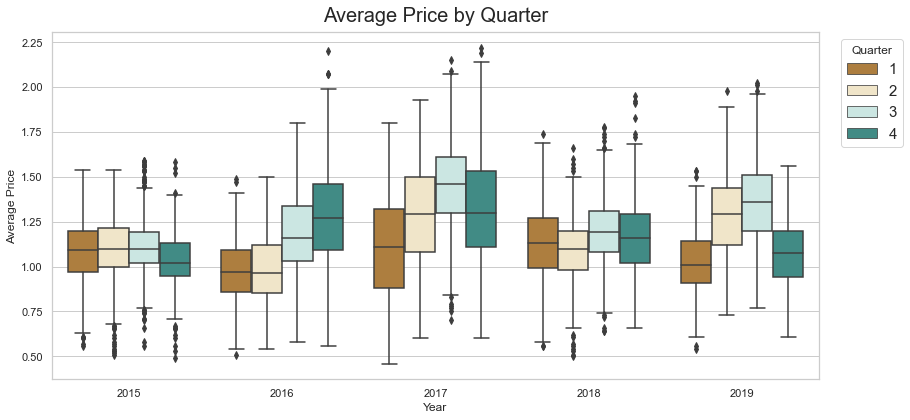

In [62]:
# Let's show how the Average Price by Month and Quarter. When is the price higher?
# Set figure size
plt.figure(figsize=(6,3))
# Plot using Year, Average Price and show it by Quarter
sns.boxplot('Year','Average Price',data=avo20,hue='Quarter', palette="BrBG")
#Set title and legend
plt.title("Average Price by Quarter", fontsize=20, pad=10)
plt.legend(title='Quarter', bbox_to_anchor=(1.12, 1), loc='upper right', fontsize=15)
plt.tight_layout(rect=(0,0,2,2))
# Show plot
plt.show()

#### Conclusion -
- In 2017, there was a weak harvest but the demand stayed consistent, so the prices went up.
- The prices in 2018 stabilized and went back to between \\$1.10 and \\$1.35.
- Generally, prices in the 2nd and 3rd go up, which is when we have Cinco de Mayo and Independence Day.
- Prices are usually lower in the 1st quarter are lower, possibly due to the winter months.

### <p style="color:blue">Question 11 - In which Region were the most avocados sold?<p/>

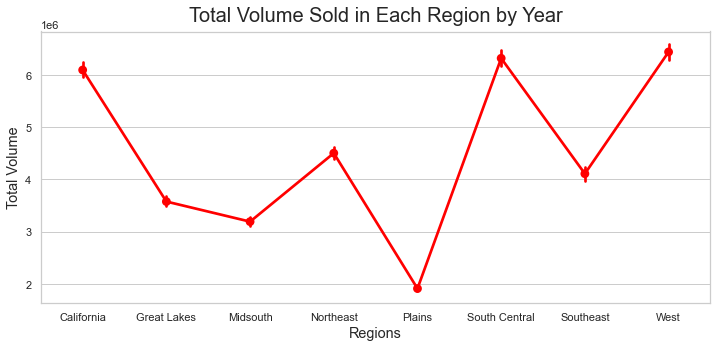

In [63]:
# Let's use a pointplot to see the Total Volume of Avocados were sold by City.
# Set figure size and style
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
# Create poinplot for Total Vol for Regions by Year
sns.pointplot(data=Regionsdf,x='Location', y='Total Vol',color='red')
# Set title and label
plt.title("Total Volume Sold in Each Region by Year",fontsize=20, pad=10)
plt.xlabel('Regions',fontsize='large')
plt.ylabel('Total Volume',fontsize='large')
# Show plot
plt.show()

#### Conclusion - 
From this pointplot it seems that folks in South Central buy more Avocados than the West or California. However, since the state of California is set as a region by the Hass Avocado Board, we can safely say that California buys more Avocados than any State in the U.S.

### <p style="color:blue">Question 12 - Which major Cities buy the most and least avocados by Volume and Bags?<p/>

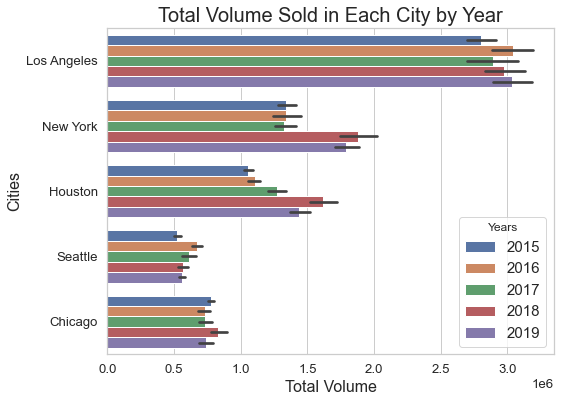

In [158]:
# Let's use a pointplot to see the Total Volume of Avocados were sold by City.
# Set Figure size and style
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
# Create a barplot for Total Volume by Major Cities through the years
sns.barplot(x='Total Vol',y='Location',data=MajorCitiesdf, hue='Year',palette="deep")
# Set title and labels
plt.title("Total Volume Sold in Each City by Year",fontsize=20)
plt.xlabel('Total Volume',fontsize=16)
plt.ylabel('Cities',fontsize=16)
# Set legend
plt.legend(title='Years', loc='bottom right', fontsize=15)
# Show plot
plt.show()

#### Conclusion -
It seems we Angelenos LOVE Avocados more than anyone else in the country. New York and Houston come in second and third.

### <p style="color:blue">Question 13 - Do Small size avocados sell more than the Large and XLarge?<p/>

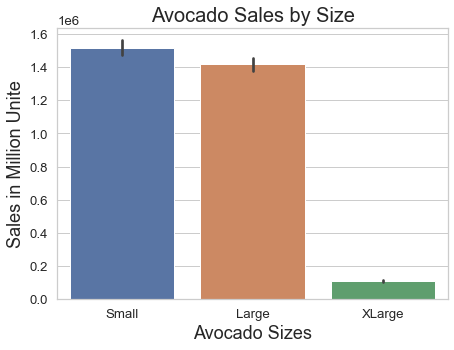

In [162]:
# Let's find out which size sells more
# Set figure 
plt.figure(figsize=(7,5)) 
# Display a plot 
Sizes= Regionsdf[['Small', 'Large', 'XLarge']]
sns.barplot(data=Sizes)

# Set labels
plt.xlabel('Avocado Sizes',fontsize=18) 
plt.ylabel('Sales in Million Unite',fontsize=18) 
plt.title('Avocado Sales by Size',fontsize=20) 
# Show the plot 
plt.show()

#### Conclusion -
Small avocados sold more than both other Sizes.

## The Properties and characteristics of the p-value : 
- When p-value is  < 0.001 : we say there is strong evidence that the correlation is significant.  
- When p-value is  < 0.05  : there is moderate evidence that the correlation is significant. 
- When p-value is  < 0.1   : there is weak evidence that the correlation is significant.  
- When p-value is  > 0.1   : there is no evidence that the correlation is significant.

## Pearson Tests:

In [72]:
#I dont think I got the conclusions right
pearson_coef, p_value = stats.pearsonr(avo20['Large'], avo20['Average Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.04944810868437366  with a P-value of P = 5.232589263490471e-09


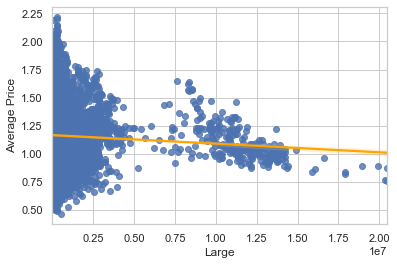

In [73]:
# Let's see the pattern of sales of Large Avocados by Total Volume each year.
sns.regplot(x='Large', y='Average Price', data=avo20,line_kws={'color':'orange'})

#### Conclusion -
The relationship between Large avocados and Average Price is neutral.


In [74]:
#I dont think I got the conclusions right
pearson_coef, p_value = stats.pearsonr(avo20['Small'], avo20['Total Vol'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.975133569005529  with a P-value of P = 0.0


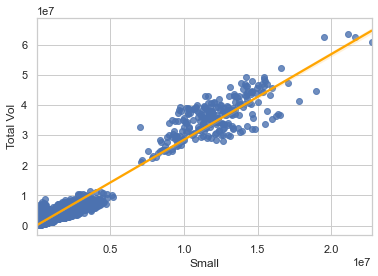

In [75]:
# Let's see the pattern of sales of Small Avocados by Total Volume each year.
sns.regplot(x='Small', y='Total Vol', data=avo20,line_kws={'color':'orange'})

#### Conclusion - 
The relationship between the two is very strong. Regardless of the Size and Price of the Avocados, the demand is consistently high.

# Hypothesis 1

## More Small Bags of avocados were sold than Large Bags

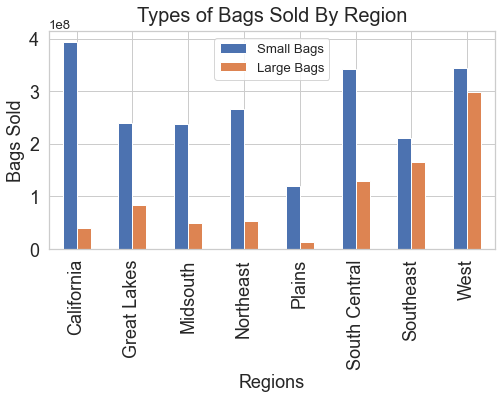

,Small Bags,Large Bags,Sum
Location,,,
California,393794330.870,40329862.060,434124192.930
Great Lakes,240371464.970,83629227.440,324000692.410
Midsouth,237393790.100,49269361.400,286663151.500
Northeast,265274481.990,53526441.700,318800923.690
Plains,120532593.100,13754014.970,134286608.070
South Central,342435831.540,129956999.280,472392830.820
Southeast,210363385.470,166015276.790,376378662.260
West,344724929.670,298650969.610,643375899.280


In [178]:
# Display a plot  
Bags = Regionsdf[['Small Bags', 'Large Bags']].groupby(Regionsdf.Location).sum()
Bags.plot(kind='bar', fontsize = 18,figsize=(8,4))

# Set labels
plt.xlabel('Regions',fontsize=18) 
plt.ylabel('Bags Sold',fontsize=18) 
plt.title('Types of Bags Sold By Region',fontsize=20, pad=10) 
# Show the plot 
plt.show()

"""                  Groupby Table           """
#Remove the exponential notation for the group by
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Group by location to show the sum of small and large bags
RSum=Regionsdf.groupby('Location')['Small Bags','Large Bags'].sum()
RSum['Sum']=RSum.sum(axis=1)
RSum

With this plot we can see the regions that sold the most small and large bags in the years 2015 - 2019. What stands out the most is how much California sold alone compared to the other regions.

California: 434,124,192.930

West: 643,375,899.280

Southeast: 376,378,662.260

In [87]:
#create a new data frame that includes small bags, large bags, avocado sales and years
Piv_Year_RGB=pd.melt(Regionsdf,value_vars=['Small Bags','Large Bags'], #pivot these columns to rows
                 value_name='Avocado Sales', #Rename the column that holds the avocado sales values
                 id_vars='Year',#use this row as the identifier for the row
                 var_name='Avocado Size') #Rename the column that holds Small, Large, XLarge values
Piv_Year_RGB.head()

,Year,Avocado Size,Avocado Sales
0,2015,Small Bags,477193.38
1,2015,Small Bags,412779.64
2,2015,Small Bags,429166.89
3,2015,Small Bags,669970.50
4,2015,Small Bags,177360.20


Text(0.5, 1.0, 'Small & Large Avocado Bag Sales')

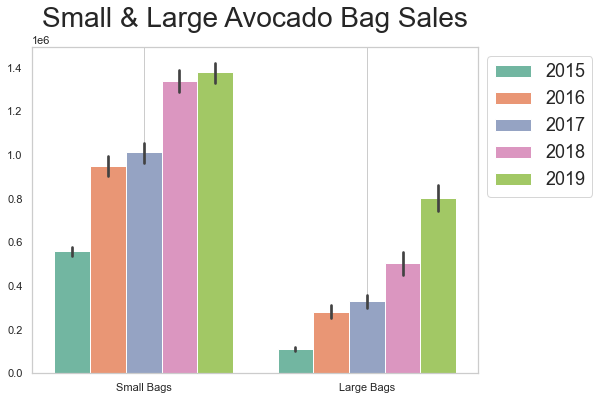

In [88]:
"""                       Bar Plot 2015 - 2019 Avocado Sales by Regions             """

plt.figure(figsize=(8,6)) #set the size of the plot

"""              Plot                     """
sns.barplot(data=Piv_Year_RGB,
            x='Avocado Size', #set the x axis using years
            y='Avocado Sales', #set the y axis Avocado sales
             hue='Year', # Creates the bins using the avoacado sizes
            palette='Set2') #Change the colors of the bins

"""              Plot Editing            """
plt.legend(bbox_to_anchor=(1,1),fontsize=18) # set the legend outside
plt.ylabel('')#Rename the y axis
plt.xlabel('') #Remove the x label
plt.grid() #show grid
plt.title('Small & Large Avocado Bag Sales',fontsize=28, pad=20) #add a title to the plot, pad moves the title up

### Conclusion
Above we can visualize how Small and Large Bags sold through 2015 and 2019. It is apparent that small bags surpassed the sales of large bags every year.

In [89]:
#Groupby Avocado Size and show stats for the avocado sales
YrSB=Piv_Year_RGB.groupby(['Avocado Size'])['Avocado Sales']
YrSB.aggregate(['count',np.mean,np.std]).round(2) #show the count, mean and standard deviation

,count,mean,std
Avocado Size,,,
Large Bags,2064,404618.29,484471.76
Small Bags,2064,1044036.24,536701.97


In [90]:
#calculate the mean difference
#create varibles to hold the mean
lbm=Regionsdf['Large Bags'].mean()
sbm=Regionsdf['Small Bags'].mean()
mdif=sbm-lbm #subtract the means
print ('Mean difference of Small and Large bags;',mdif)#print the mean difference

Mean difference of Small and Large bags; 639417.952742246


We can see the count for Large and Small Bags at 2064. Having the same number for both data sets is a good sign so that we can have an even comparison.

The mean for the Large bags is 404,618.29 and Small Bags has a mean of 1,044,036.24. With a mean difference of 639,417.95,it makes sense that small bags will have a greater mean since their sales were greater by a large margin.

The standard deviation for large bags was at 484,471.76 and small bags was at 536,701.97. Even though the standard deviation is off by about 150,000, small bags still had the larger number due to the larger volume of sales.

In [91]:
#import statistics to get the pvariance
import statistics 

#We want to get the pvariance from Regionsdf using small and large bags
LBVar=statistics.pvariance(Regionsdf['Large Bags'])
SBVar=statistics.pvariance(Regionsdf['Small Bags'])
VarDif=SBVar-LBVar #get the difference between the two 

#print out the variance
print("Variance of Small Bags set:",SBVar) #small bags variance
print("Variance of Large Bags set:",LBVar) #large bags variance
print('Variance difference:',VarDif) #variance difference

#call pearson_r function to Compute Pearson correlation coefficient for Small Bags and Large Bags
SLBagsP = pearson_r(Regionsdf['Small Bags'], Regionsdf['Large Bags'])

# Print the result
print('Pearson correlation:',SLBagsP)

Variance of Small Bags set: 287909448498.5859
Variance of Large Bags set: 234599167493.6302
Variance difference: 53310281004.95569
Pearson correlation: 0.41859577123706326


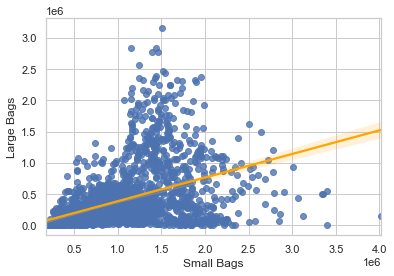

In [92]:
#plot the correlation coefficient
#Use Small Bags and Large Bags from Regionsdf
sns.regplot(x='Small Bags', y='Large Bags', data=Regionsdf
            ,line_kws={'color':'orange'}) #change the correlation line to orange color

#### Conclusion -
There is a positive relationship between Small Bags and Large Bags.

In [93]:
#Calculate the pearson coefficient
#Apply stats.pearsonr function to Small Bags and Large Bags from Regionsdf
pearson_coef, p_value = stats.pearsonr(Regionsdf['Small Bags'], Regionsdf['Large Bags'])
#print values in pearson_coef and p_value
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value oavo20f P =", p_value)

The Pearson Correlation Coefficient is 0.4185957712370634  with a P-value oavo20f P = 2.3187438985522803e-88


#### Conclusion -
The variance shows Small Bags as having a greater variance by 53.3 billion and a pearson correlation of .419.

With a correlation of .419, we can conclude that they have a medium strenght correletion. Having lower sales on the small bags will likely result in lower sales of large bags.

Text(0.5, 1.0, '')

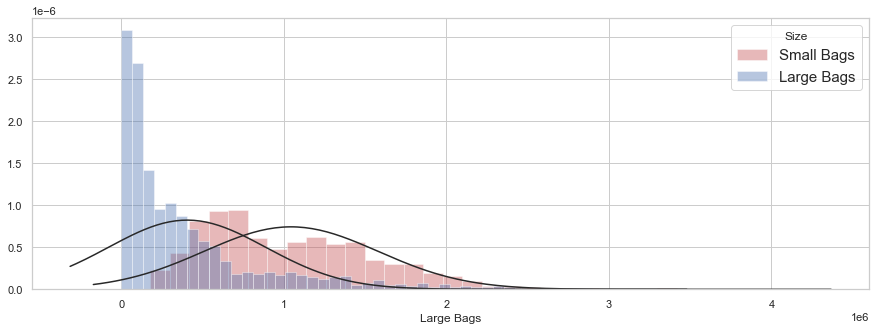

In [94]:
# Set the figure dimensions
fig, ax = plt.subplots(figsize=(15, 5))
# plot the distribution
#sns.distplot(a=Regionsdf['Small'], kde=False, fit=norm,label='Small')
#sns.distplot(a=Regionsdf['Large'], kde=False, fit=norm,label='Large')
sns.distplot(a=Regionsdf['Small Bags'], kde=False, fit=norm,label='Small Bags',hist=True,color='r')
sns.distplot(a=Regionsdf['Large Bags'], kde=False, fit=norm,label='Large Bags',hist=True)
plt.legend(title='Size', loc='upper right', fontsize=15)
# set the title
plt.title("")

#### Conclusion -
The distribution plot above shows how large bags had more sales in the lower end while small bags had their sales spread out a little more. Small bags had more bins popping up on the higher end, which shows again how small bags sold at greater volumes.

## Normal Distribution

In [95]:
#Another example Note Gaussian -- Normal Distribution
from scipy.stats import normaltest
#compute the normal test for Large bags and small bags
statS, pS = normaltest(Regionsdf['Large Bags'])
statL, pL = normaltest(Regionsdf['Small Bags'])

#print the stats and the p
print('Small Bags:','stat=%.3f, p=%.3f' % (statS, pS))
print('Large Bags:','stat=%.3f, p=%.3f' % (statL, pL))
#If else for small bags
if pS > 0.05:
  print('Small Bags: Probably Gaussian')
else:
  print('Small Bags: Probably not Gaussian')
#If else for Large Bags
if pL > 0.05:
  print('Large Bags: Probably Gaussian')
else:
  print('Large Bags: Probably not Gaussian')

Small Bags: stat=845.340, p=0.000
Large Bags: stat=247.078, p=0.000
Small Bags: Probably not Gaussian
Large Bags: Probably not Gaussian


#### Conclusion -
With the Gaussian test applied to both Small and Large Bags, the results show that they are probably not Gaussian so they do not have a normal distribution. 

# Skewness
Lets find the skew since they do not have a normal distribution.

In [96]:
from scipy.stats import skew 
import numpy as np  
  
#use np.random.normal to get samlples from small and large bags to compute the skew of the distribution
y = np.random.normal(Regionsdf['Large Bags']) 
x = np.random.normal(Regionsdf['Small Bags'])  

#Print out the skewness values using skew from scipy 
print('\nSkewness for Small Bags : ', skew(x)) 
print('\nSkewness for Large Bags : ', skew(y)) 

#print the 


Skewness for Small Bags :  0.8943802162275187

Skewness for Large Bags :  2.0487072203425156


In [97]:
#get the mean and median of the large and small bags
LgMe,LgMed=Regionsdf['Large Bags'].mean(),Regionsdf['Large Bags'].median()
SmMe,SmMed=Regionsdf['Small Bags'].mean(),Regionsdf['Small Bags'].median()

#logical test to tell if the the mean is greater than or less than the median.
#help determine the if the distribution has a positive or negative skew.
if LgMe>LgMed:
    print('Large Bags: The mean is greater than the median, positive skew.')
else:
    print('Large Bags: The mean is less than the median, negative skew.')
    
if SmMe>SmMed:
    print('Small Bags: The mean is greater than the median, positive skew.')
else:
    print('Small Bags: The mean is less than the median, negative skew')

Large Bags: The mean is greater than the median, positive skew.
Small Bags: The mean is greater than the median, positive skew.


#### Conclusion -
The results for the skewness code actually supports the distribution plot. With a 0.89 score for the small bags, and 2.048 for large bags, we can back up the distriburtion plot showing more positive skewness on the Large bags than the small bags.

When plotting the distribution between Small Bags and Large Bags, we find that they have a Platykirtic or negative kurtosis. While both distributions have a positive skew, it is more appearant in the Large Bags. 

# ANOVA (1)

In [98]:
#create a variable that groups by the size of bags
GrpSz=Piv_Year_RGB.groupby(['Avocado Size'])

#use stats.f_oneway to compute anova
anova_result_1=stats.f_oneway(GrpSz.get_group('Small Bags')['Avocado Sales'], GrpSz.get_group('Large Bags')['Avocado Sales'])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=1614.267202137301, pvalue=3.3822604967313385e-298)


#### Conclusion - 
We can see the the F score is at 1,614 which means that the sales between Small and Large bags vary by a large margin. With a large number on the f score and the pvalue of 3.3, we can say that they have a storn correlation.

# Chi2

In [ ]:
#giving a our variables a name to make it easier to test
table = [Regionsdf['Small Bags'],Regionsdf['Large Bags']]
#using chi2_contingency to find how dependent our variables are to one another
stat, p, dof, expected = chi2_contingency(table)
#print our result 
print('stat=%.3f, p=%.3f' % (stat, p))
#set our function and value to .05
if p > 0.05:
   print('Probably independent')
else:
  print('Probably dependent')

#### Conclusion -
With the Chi2 test coming back as probably dependant, it is safe to say that the sales will follow each other in either direction.

## Conclusion for Hypothesis 1:
Now that we dug deaper into the differences between the sales of Small and Large Bags of Avocados, we can conclude that Small Bags indeed sold more than Large Bags by an average difference of 639,417.95. 

Small bags and Large bags have a moderate positive correlation with a p-value of .419, so lower sales in small bags will result in lower sales in large bags. 

At alpha=0.05 we cannot reject the null hypothesis with a p value of 0.117.

# Hypothesis 2

### Sales of avocados in 2015 were higher than 2019

### In order to compare the years 2015 and 2019, we created the following:

In [99]:
#data frame avo4 has 2015 and 2019
#group by the yuear and average price
YrSB=avo4.groupby(['Year'])['Average Price']
#show statistics based on two years
YrSB.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,2808.0,1.077963,0.170200,0.49,0.98,1.08,1.19,1.59
2019,2808.0,1.187179,0.246945,0.54,1.00,1.17,1.36,2.02


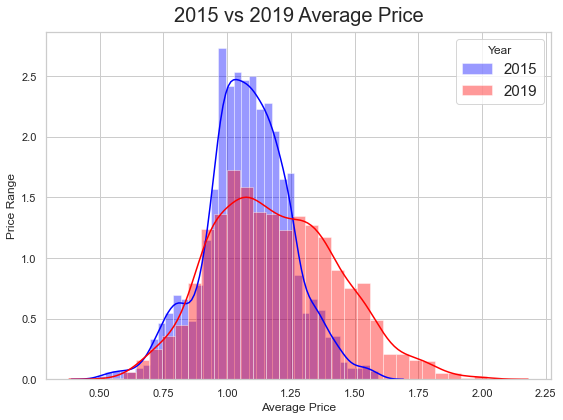

In [100]:
# Let's compare the sales of 2015 and 2019.

# Set figure size
plt.figure(figsize=(8,6))
# Choose the data sets to compare
sns.distplot(a2015['Average Price'], label='2015', color='#0000ff')
sns.distplot(a2019['Average Price'], label='2019', color='#ff0000')
# Set the labels and title
plt.xlabel("Average Price")
plt.ylabel("Price Range")
plt.title("2015 vs 2019 Average Price", pad=10, fontsize=20)
# place the legend outside the figure/plot
plt.legend(title='Year', loc='upper right', fontsize=15)
plt.tight_layout()
plt.show()

In [101]:
#Computing the ocrrelation between the two coefficients
pearson_r(a2015['Average Price'], a2019['Average Price'])

0.45454967025456844

<h4>Conclusion -</h4>
<p> It appears that 2015 had higher counts for \$1.00-\$1.20 in Average Price, but overall 2019 had a better seemed to have sold more Avocados over time than 2015 did. This could possibly be due to high demand in 2019.

#### Time for the Gussian Test (aka the Normal Distribution test) between 2015 and 2019 in Average Price

In [102]:
#Another example Note Gaussian -- Normal Distribution
from scipy.stats import normaltest
#compute the normal test for Large bags and small bags
stat15, p15 = normaltest(a2015['Average Price'])
stat19, p19 = normaltest(a2019['Average Price'])

#print the stats and the p
print('Average Price in 2015:','stat=%.3f, p=%.3f' % (stat15, p15))
print('Average Price in 2019:','stat=%.3f, p=%.3f' % (stat19, p19))
#If else for Average Price
if p15 > 0.05:
  print('Average Price in 2015: Probably Gaussian')
else:
  print('Average Price in 2015: Probably not Gaussian')
#If else for Average Price
if p19 > 0.05:
  print('Average Price in 2019: Probably Gaussian')
else:
  print('Average Price in 2019: Probably not Gaussian')

Average Price in 2015: stat=20.911, p=0.000
Average Price in 2019: stat=46.682, p=0.000
Average Price in 2015: Probably not Gaussian
Average Price in 2019: Probably not Gaussian


<p> Looks like the test shows that the results do not seem likely that they have a normal distribution. Oddly enough this similarity could have been some of the evidence for the P-Value to consider about their relationship between the two.

In [137]:
#using print to describe our plan
print('Before we start our Z-Test lets find our Degrees of Freedom:')
#naming our variable for a2015['Average Price'] ztdof (z-test degrees of freedom)
#a2019 didn't get the same treatment as it askewed our calculations
ztdof= a2015['Average Price'].count() - 1
ztdof

Before we start our Z-Test lets find our Degrees of Freedom:


2807

# ANOVA (2)

 ### Now we will test these variables in a Z-Test with the following statements:</h2>

  <p>I will be using a2015['Avergae Price'] as my sample
 <br>For my hypothesis testing value I will use the mean of a2109['Average Price']
 <br>I will use the the larger alternative because the mean is larger than the value
 <br>As noted above our Degrees of Freedom is 2807

In [177]:
#using z-test to find the p-value for a2015['Average Price'] and a2019['Average Price']
#our value is $1.10, ddof is 2807 defined as ztdof, and our alternative is larger
(test_statistic, p_value) = ztest(x1=a2015['Average Price'], x2=a2019['Average Price'], value=1.10,
                                  alternative='larger', ddof=ztdof)
                                  
#printing our outcome
print("The test statistic is: ", round(test_statistic))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -4.0
The p-value is:  0.99997


### Conclusion -
HO= 2015 Average Price is greater than the Average Price in 2019
<br>
H1= 2015 Average Price is less than the the Average Price in 2019

It appears that I have failed to reject the null hypothesis. It looks as if 2019 COULD have a higher Avergae Price than 2015.

### Finally let us conduct a Chi-squared test to see if they are close to one another

In [106]:
#giving a our variables a name to make it easier to test
table = [a2015['Average Price'],a2019['Average Price']]
#using chi2_contingency to find how dependent our variables are to one another
stat, p, dof, expected = chi2_contingency(table)
#print our result 
print('stat=%.3f, p=%.3f' % (stat, p))
#set our function and value to .05
if p > 0.05:
   print('Probably independent')
else:
  print('Probably dependent')

stat=59.424, p=1.000
Probably independent


#### Conclusion -</h1>

<p> Looks like 2015 and 2019 seem very independent from one another. It doesn't seem like over time that these two variables would affect one another in the long run as I had hoped they would. With this new knowledge, I can not refuse the null hypothesis and accept it as a potential fact.

### Conclusion for Hypothesis 2:
<p>Even though the average price for avocados slowly rose over time, the possible constant average price could’ve been $1.10, but that’s where the relationship between 2015 and 2019 seem to stop as the values we found seem to dictate that they don’t depend on each other. From our plot maps we could see that 2019 had better sales over all than 2015 did.

## Hypothesis 3 - 
### The Total Volume of avocados sold is higher in Los Angeles than New York.

### Pearson Correlation Heatmap for Los Angeles

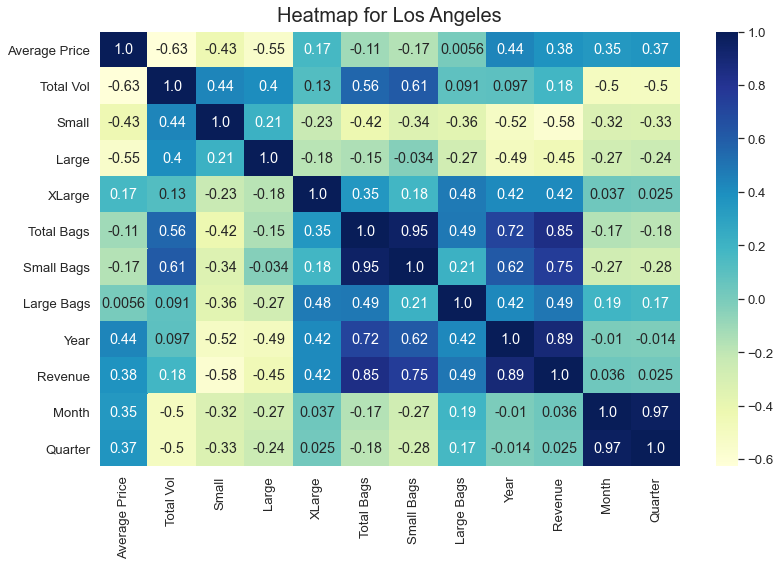

In [142]:
# Create heatmap of the correlations between these columns for LA
#Set figure size
plt.figure(figsize = (13,8)) 
sns.set(font_scale=1.2)
# Assign the type of correlation
corr = LAdf.corr('pearson')
# Create the heatmap with format and color
sns.heatmap(corr,annot=True,fmt='.2',cmap="YlGnBu");
# Set title
plt.title('Heatmap for Los Angeles',fontsize=20, pad=10) 
# Show the plot 
plt.show()

#### Conclusion <b> 
1) We can see that there is a Positive correlation between:
- Small Bags and Total Bags      = .95
- Year and Revenue               = .89
- Total Bags and Revenue         = .85
 
2) We can see Negative correlation between:
- Total Vol and Average Price    = -0.63
- Small and Revenue = -0.58
- Average Price and Large = -0.55
- Small and Year = -0.52

### Pearson Correlation Heatmap for New York

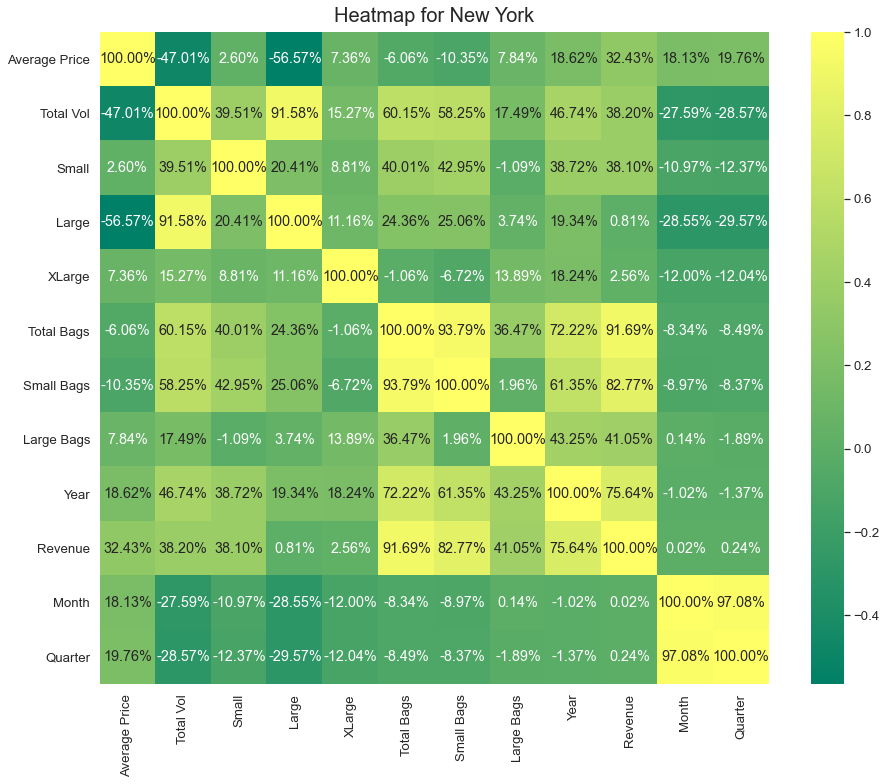

In [152]:
# Create heatmap of the correlations between these columns for LA
#Set figure size
plt.figure(figsize = (15,12)) 
sns.set(font_scale=1.2)
# Assign the type of correlation
corr = NYdf.corr('pearson')
# Create the heatmap with format and color
sns.heatmap(corr,cmap='summer',annot=True,fmt='.2%');
# Set title
plt.title('Heatmap for New York',fontsize=20, pad=10) 
# Show the plot 
plt.show()

#### Conclusion - <b> 
1) We can see that there is a Positive correlation shown by percentage between:
- Total Bags and Small Bags      = 93.79 %
- Total Bags and Revenue         = 91.69 %
- Total Vol and Large            = 91.58 %
 
2) We can see Negative correlation between:
- Large and Average Price        = -56.57 %
- Total Vol and Average Price    = -47.01 %
    

In [112]:
print('The mean Total Volume for Los Angeles and New York is', '%.4f' % avoCity['Total Vol'].mean(), 'Whereas the covariance for the Total Volume is', 
      '%.4f' % np.cov(avoCity['Total Vol']),'The Variance Result is', '%.4f' %  np.var(avoCity['Total Vol']), 
      'and finally the sum of Total Volume is', np.sum(avoCity['Total Vol']))

The mean Total Volume for Los Angeles and New York is 2241310.9937 Whereas the covariance for the Total Volume is 766016750970.9664 The Variance Result is 764532222383.8134 and finally the sum of Total Volume is 1156516472.77


#### Conclusion -
<p>The mean of the Total Volume of the Sample is almost 2.2 million and the standard deviation is 875223 (less than a million). We also learned that the Total Volume has a min that is roughly 6.182798 (also less than a million) and the max is roughly 5.6 million

In [113]:
avoCity['Total Vol'].sum()

1156516472.77

#### Conclusion - 
The Total Volume of avocados sold just between Los Angeles and New York between 2015 and 2019 was 1,156,516,472.77 billion avocados.

In [114]:
import statistics #importing the proper library
print('Population mean:', avoCity['Total Vol'].mean()) #printing out our population mean
print('Standard Deviation:',statistics.pstdev(avoCity['Total Vol'])) #printing out our population standard deviation

Population mean: 2241310.9937403114
Standard Deviation: 874375.3326711667


#### Conclusion -
The mean of the Total Volume of the population is almost 1.78 million and the standard deviation is approximately 5.1 million.

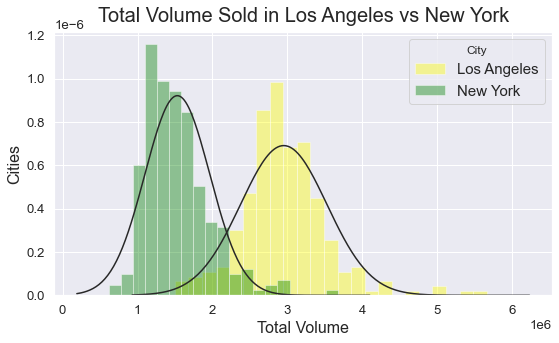

In [115]:
# Create two distplots to compare Total Volume sold in LA and NY
# Set the figure dimensions
fig, ax = plt.subplots(figsize=(8, 5))
# plot the distribution
sns.distplot(a=LAdf['Total Vol'],label='Los Angeles', color='yellow',kde=False, fit=norm)
sns.distplot(a=NYdf['Total Vol'], label='New York', color='green',kde=False, fit=norm)
# set the title and labels
plt.title("Distribution of the Total Volume Sold")
plt.xlabel("Total Volume", fontsize=16)
plt.ylabel("Cities", fontsize=16)
plt.title("Total Volume Sold in Los Angeles vs New York", pad=10, fontsize=20)
# place the legend outside the figure/plot
plt.legend(title='City', loc='upper right', fontsize=15)
plt.tight_layout()
plt.show()

#### Conclusion -</h1>
<p> It appears that New York buys more than California, but in actuality California buys far more in bulk judging from the bell curves.

In [117]:
#Another example Note Gaussian -- Normal Distribution

#compute the normal test for LA and NY
statLA, pLA = normaltest(LAdf['Total Vol'])
statNY, pNY = normaltest(NYdf['Total Vol'])

#print the stats and the p
print('LA Total Vol:','stat=%.3f, p=%.3f' % (statLA, pLA))
print('NY Total Vol:','stat=%.3f, p=%.3f' % (statNY, pNY))
#If else for LA
if pLA > 0.05:
  print('LA Total Vol: Probably Gaussian')
else:
  print('LA Total Vol: Probably not Gaussian')

#If else for NY
if pNY > 0.05:
  print('NY Total Vol: Probably Gaussian')
else:
  print('NY Total Vol: Probably not Gaussian')

LA Total Vol: stat=61.040, p=0.000
NY Total Vol: stat=65.908, p=0.000
LA Total Vol: Probably not Gaussian
NY Total Vol: Probably not Gaussian


#### Conclusion  -</h1>
Even though the data we used was not Gaussian, While it appears that for Los Angeles the values still back up the distribution plot. For New York too thedistributions seems normal, but the skew is Leptokurtic.

## Degrees of Freedom and z-Test

#### We need to grab the right variables for our Z-Test such as our Degrees of Freedom, population mean, and the population standard deviation

In [118]:
#using print to show our population mean and standard deviation
print('Our mean of Total Volume is:', avoCity['Total Vol'].mean(),
     'and our Standard Deviation:', avoCity['Total Vol'].std())

Our mean of Total Volume is: 2241310.9937403114 and our Standard Deviation: 875223.8290694366


In [119]:
# Get the degrees of freedom
ztdof= avoCity['Total Vol'].count() - 1
ztdof

515

#### Conclusion -
- The mean is 2241310.993
- The Standard Deviation: 875223.829
- Our Degrees of Freedom is 515

### Standard deviations of the pop are either assumed to be equal, usevar=pooled or unequal, usevar=unequal

$\begin{align}
  & {{H}_{0}}:\,{{\mu }_{1}}\,=\,{{\mu }_{2}} \\ 
 & {{H}_{1}}:\,{{\mu }_{1}}\,\ne \,{{\mu }_{2}} \\ 
\end{align}$

### Two tailed-test

HO= LA average Total Volume is equal to NY average Total Volume. <br>
H1= LA average Total Volume is not equal to NY average Total Volume.

In [120]:
(tstat, p_value)= CompareMeans.from_data(LAdf['Total Vol'],NYdf['Total Vol']).ztest_ind(alternative='two-sided',usevar='unequal',value=2241310)

In [121]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -18.24385
The p-value is:  0.0


In [122]:
#Two-tailed test p_value

if p_value < 0.05:
    print('We reject Null Hypothesis')
    
else:
    print('We fail to reject Null Hypothesis')

We reject Null Hypothesis


#### Conclusion - 
LA average Total Volume sold is greater than NY average Total Volume, therefore we reject the null hypothesis.

### Left-tailed-test

HO= LA average Total Volume is greater than or equal to NY average Total Volume. <br>
H1= LA average Total Volume is less than NY average Total Volume.

In [123]:
(tstat, p_value)= CompareMeans.from_data(LAdf['Total Vol'],NYdf['Total Vol']).ztest_ind(alternative='smaller',usevar='unequal',value=2241310)

In [124]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -18.24385
The p-value is:  0.0


In [125]:
#Left-tailed test p_value

if p_value < 0.05:
    print('We reject Null Hypothesis')
    
else:
    print('We fail to reject Null Hypothesis')

We reject Null Hypothesis


#### Conclusion -
LA average Total Volume sold is not less than NY average Total Volume, therefore we reject the null hypothesis.

### Right-tailed-test

HO= LA average Total Volume is less than or equal to NY average Total Volume. <br>
H1= LA average Total Volume is greater than NY average Total Volume.

In [126]:
(tstat, p_value)= CompareMeans.from_data(LAdf['Total Vol'],NYdf['Total Vol']).ztest_ind(alternative='larger',usevar='unequal',value=2241310)

In [127]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -18.24385
The p-value is:  1.0


In [128]:
#Right-tailed test p_value

if p_value < 0.05:
    print('We reject Null Hypothesis')
    
else:
    print('We fail to reject Null Hypothesis')

We fail to reject Null Hypothesis


#### Conclusion -
LA average Total Volume sold is greater than NY average Total Volume, therefore we fail to reject Null Hypothesis.

### Now we will test these variables in a Z-Test with the following statements:</h2>
    
  <p>We will be using LAdf['Total Vol'] and NYdf['Total Vol'] for our hypothesis will be our testing value 2241310.

# Chi-square Test

In [129]:
#giving a our variables a name to make it easier to test
table = [LAdf['Total Vol'],NYdf['Total Vol']]
#using chi2_contingency to find how dependent our variables are to one another
stat, p, dof, expected = chi2_contingency(table)
#print our result 
print('stat=%.3f, p=%.3f' % (stat, p))
#set our function and value to .05
if p > 0.05:
   print('Probably independent')
else:
  print('Probably dependent')

stat=13730820.797, p=0.000
Probably dependent


#### Conclusion -
Looks like Los Angeles and New York might have some dependency on each other as the P-Value seems to be <.0001

# ANOVA (3)

In [130]:
#extract the make and price data
df_anova=avoCity[["Location","Total Vol"]]

#group the data by different makes
grouped_anova=df_anova.groupby(["Location"])

In [131]:
#The ANOVA test can be performed in Python using the f_oneway method #as the built-in function of the scipy package. 
anova_result_1=stats.f_oneway(grouped_anova.get_group('Los Angeles')['Total Vol'], grouped_anova.get_group('New York')['Total Vol'])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=995.2454093100184, pvalue=2.5850274788778364e-122)


## Conclusion for Hypothesis 3 -
The Average Price difference between Los Angeles and New York is very high because the F-score is 995.245 and the p-value is extremely small which indicates that there is strong evidence that the correlation is significant. Therefore we fail to reject the null hypothesis.

# Summary

#### Prices of Organic avocados always far surpass those of Conventional avocados, regardless of year. However, their sales and revenue cycle matches that of the Conventional avocados.

#### Both Conventional and Organic avocados seem to have a normal distibution.

#### Average Price that was most frequent was in the \\$1.00 - \\$1.25 range and was bought at this price as shown by the right bubble. For example in March and April, the splotch gets darker showing that price range as mentioned had a boom sales around this period. Although on the other hand, if we look at the outer edges it looks like not a lot of people were buying Avocados. Granted it is pricey to buy Avocados for around $1.75, but it is odd that people wouldn't buy Avocados for less than 0.75 cents. I wonder if we will be able to see a more in-depth example later on....

#### It appears that 2016 and 2017 had a price hike more than \\$1.75 in these years and seem more slim comparing it to the other years. There was also a bit of a drop in price in 2018, but the price rose again in 2019 to more than \\$1.75.

#### Although more avocados between the price range of .80 cents upto $1.25 in 2015, generally, more expensive avocados were sold in 2019 for between .80 cents upto \\$1.60.

#### There is similar distribution and positive relationship between Small size and Small Bags of avocados.

#### For Small avocados over the years 2015 to 2019:<br>
1) The sales in West and California regions has declined.<br>
2) South Central and the Plains has remained constant.<br>
3) Great Lakes, Midsouth, Northeast has increased, but in the Southeast it has increased even more.<br>

#### Small Bags sold more in all regions.
#### Large Bags sold most in the West.

A thing to note is that although the quantity of Small Bags sold in California, we have to remember that all the other regions have more than two states in them, whereas California is a state and a region at the same time for this comparison. So by comparison, California bought even more Small Bags than it seems. *Would have loved to explore this more, the limitation of this iplot is that the value of sales by weekend is stacked and so not easy to read*.

- The plot above shows how the average price kept rising through out the years 2015, 2016 and 2017.
- 2015 and 2016 both had 60% or less of avocados at the average price of \$1.10.
- 2017 had 60% or less of avocados at the average price of \$1.34. 

The percentages for the average price in 2015, 2016, and 2017 for Regions. We can see that: 
- 20% of Regions sold avocados for the average price of \$.98 or less.
- 60% of Regions sold avocados for the average price of \$1.34 or less.
- 90% of Regions sold avocados for the average price of \$1.62 or less.
- 100% of Regions sold avocados for the average price of \$1.98 or less.

#### We can see the price hike in 2017, lets look at the percentiles.

At the 25th percentile, 2017 had a higher price at \\$1.0575 and 2019 had the lower price at $0.99. The interesting part is that the price stayed similar for about 12% of regions, so only about 13% of regions sold avocados at a slightly higher price.

At the 50th percentile, 2017 kept the lead hitting \\$1.29 and 2019 was lower at \\$1.15, a 14 cent price difference.

At the 75th percentile, 2017 had prices at $1.43 for small avocados while 2019 had them at \\$1.32, an 11 cent difference.

And just for fun, the max price in 2017 was \\$1.98 and 2019 had the max price of \\$1.75, a 23 cents difference for small avocados. Imagine buying small avocados for \\$1.98.

#### We can see that the price hike did indeed affect the sales but not in the way that you would think. It is apparent that for 50% of the regions, they actually sold more in 2017 with a higher average price than in 2019.

25th percentile: regions were selling 606,734 avocados in 2017 and 2019 had regions selling 730,038 avocados.

50th percentile: regions were selling 1,369,422 avocados in 2017 and 2019 had regions selling 1,383,418 small avocados. Those numbers are a little bit closer than the first 25 percent of regions.

75th percentile:Regions were selling 2,263,044 avocados in 2017 and 2019 was selling 2,023,002.

#### It is interesting that a higher price will not stop us from having avocados in their diet.

#### Annual Sales show that Avocado sales dont change too much until Quarter 3. In 2018 Quarter 3 Avocado sales rose, but then sales drop nearly in half during the 4th Quarter. In Quarter 4, 2017 sales rose above when compared to the other years.

#### The Average Prices were generally: lower in the 1st and 4th Quarters in 2015, lower in the 3rd and 4th Quarters in 2016, 2017 and 2019, and higher in the 2nd and 3rd Quarters in 2016, 2017 and 2019.

#### It seems that folks in South Central buy more Avocados than the West or California. However, since the state of California is set as a region by the Hass Avocado Board, we can safely say that California buys more Avocados than any State in the U.S.

#### It seems we Angelenos LOVE Avocados more than anyone else in the country. New York and Houston come in second and third.

#### Small avocados sold more than other Sizes.

### Note: After having finished the entire project, we realized that there is a state (South Carolina) and region (Northern New England) that aren't a city or region or a combination of city/area, and hadn't taken them out of our dataframe.

# Final Conclusion

To recap, PEOPLE REALLY LOVE AVOCADOS!! It doesn’t matter what year, month, day. Sales exceeded our expectations from sizes to location. As we have seen, Avocados sales kept increasing every year. Even Organic did somewhat well over time. Small Bags sold the most compared to other bag sizes due to being cheaper and also affordable prices. Even in size the Smaller Avocados sold far better than the other sizes. Even a so-called “2017 Avocado Apocalypse” could not stop the booming sales all the way through 2019. Although, we did have data for 2020 that insisted that sales were doing even better than 2019, the data at the moment is incomplete for a proper comparison. Finally let’s not forget the obvious, Californians go wild for Avocados as we lead the most in sales and demand.
